#### Практика 1. 

##### Сценарій

У продукті конверсія в оплату зазвичай ~10%. За два дні без змін:

* День 1: 10 000 користувачів → 1 050 оплат (10.5%)
* День 2: 10 000 користувачів → 980 оплат (9.8%)

##### Питання

1. Чи можна сказати, що «продукт погіршився» на День 2?
2. Які **реальні** причини, крім ефекту, можуть пояснити різницю?



### Практика 2
##### Сценарій

Є таблиця подій:

* `user_id, event_name, ts`
  Події: `view_page`, `start_trial`, `purchase`.

##### Питання

1. Як правильно визначити **конверсію в purchase** за день?
2. Яка типова помилка з подіями зламає метрику?


### Конверсія (Conversion Rate)

**Визначення:**  
Конверсія — це частка користувачів (або подій), які виконали цільову дію.


#### Практика 3. 

##### Сценарій

У тебе конверсія 10%.
Потрібно пояснити менеджеру, що означає «10%» для 20 користувачів.

##### Питання

Які значення оплат **можливі** і чому «рівно 2 оплати» — неправильна інтерпретація?



#### Практика 4.

##### Сценарій

Дві оцінки конверсії:

* Варіант A: 12 покупок із 100 (12%)
* Варіант B: 1 200 покупок із 10 000 (12%)

##### Питання

Чому другу оцінку вважаємо надійнішою?


#### Практика 5.

##### Сценарій

Метрики:

1. `purchase` (0/1)
2. `revenue` (грн)
3. `watch_time_sec` (сек)

##### Питання

1. Які типи випадкових величин?
2. Чому для `revenue` “середнє” часто бреше?


#### Практика 6.

##### Сценарій

Дві команди саппорту мають однаковий середній час відповіді: 60 секунд.

Команда A: 60,60,60,60,60
Команда B: 5,10,15,60,210

##### Питання

Яка команда краща для користувача і чому?



In [ ]:
arr_A = [60, 60, 60, 60, 60]

avg_ = sum(arr_A) / len(arr_A)            # знайти середнє арифметичне
step_2 = [num - avg_ for num in arr_A]
step_3 = [i ** 2 for i in step_2]
var_ = sum(step_3) / len(arr_A)           # знайти дисперсію
std_ = var_ * (0.5)                       # знайти стандартне відхилення
cv_ = std_ / avg_                         # знайти коефіцієнт варіації
print(avg_)
print(cv_)
print(std_)
print(var_)


60.0
0.0
0.0
0.0


In [ ]:
# порахувати дисперсію для заданого набору чисел.
arr_B = [5, 10, 15, 60, 210]

avg_ = sum(arr_B) / len(arr_B)          # знайти середнє арифметичне
step_2 = [num - avg_ for num in arr_B]
step_3 = [i ** 2 for i in step_2]
var_ = sum(step_3) / len(arr_B)         # знайти дисперсію
std_ = var_ * (0.5)                     # знайти стандартне відхилення
cv_ = std_ / avg_                       # знайти коефіцієнт варіації
print(avg_)
print(cv_)
print(std_)
print(var_)

60.0
50.083333333333336
3005.0
6010.0


## Основні статистичні показники (для ML)

- **Середнє (`avg_`)** — типове значення ознаки; використовується для центрування та аналізу зсуву даних.
- **Дисперсія (`var_`)** — міра розкиду даних; низька дисперсія → ознака малоінформативна.
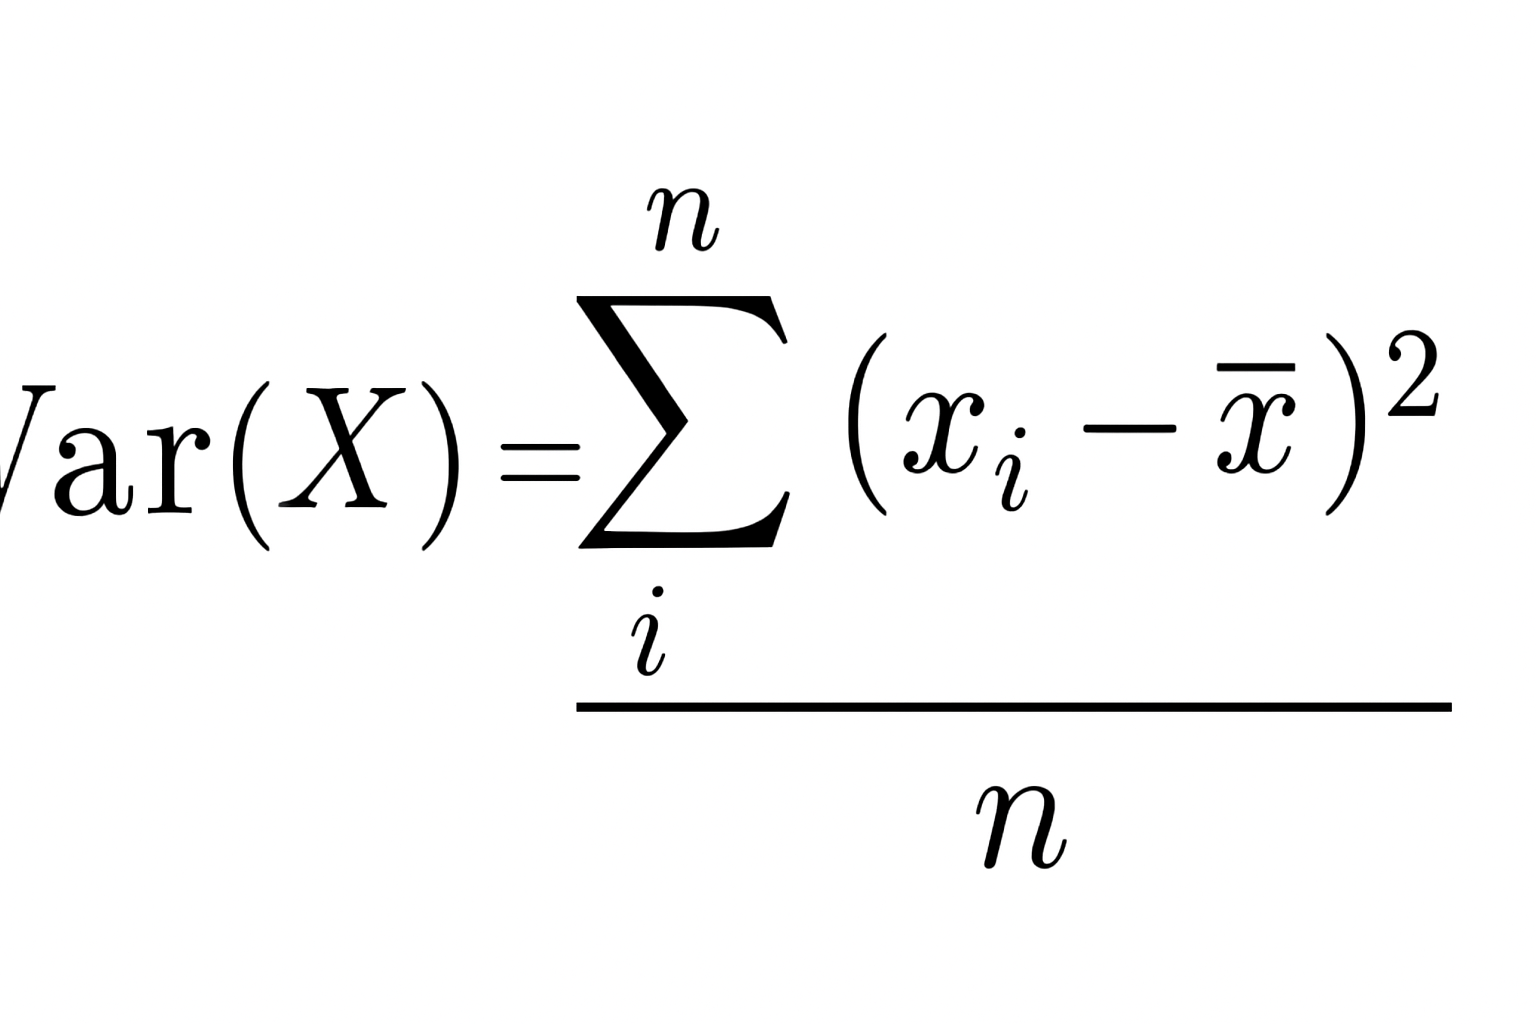 
- **Стандартне відхилення (`std_`)** — корінь із дисперсії; показує типове відхилення від середнього (в тих самих одиницях).
- **Коефіцієнт варіації (`cv_ = std_ / avg_`)** — відносний розкид; дозволяє порівнювати різні ознаки між собою.

In [10]:
# MARK: // !!!! Need to insall scipy !!!!
# pip install scipy or conda install scipy 

In [20]:
import numpy as np
from scipy import stats

np.random.seed(1)

p = 0.10        
n = 1000       

# Task. Generate bernoulli dist
# use stats.bernoulli.rvs
purchases = stats.bernoulli.rvs(p, size=n)
purchases[:100]  # first 100 users


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0])

stats.bernoulli.rvs(p, size=n) створює масив з n випадкових подій з ймовірністю p.

1 означає, що користувач здійснив покупку, 0 — не здійснив.

In [12]:
n_users = 1000
p = 0.10

# use stats.binom.rvs and add size parameters 
purchases_count = stats.binom.rvs(n=n_users, p=p, size=n_users)# you code
purchases_count [:100]  # total purchases from 1000 users

array([ 95, 111,  96,  90,  96,  99, 100,  92, 105,  99, 113, 115,  98,
        95, 114, 112,  93,  92, 119,  79,  92,  97,  98, 110,  90,  91,
       103, 115,  87,  93, 116,  89,  94,  86,  97, 105,  91, 101,  89,
        89, 120,  93,  95,  81, 113, 108,  94,  98, 107, 109,  94, 108,
        88, 103,  98,  98, 118,  94, 102, 102,  91,  76,  99,  96, 111,
        97,  92, 113,  99, 106,  96,  99,  94,  97,  77,  99, 116, 108,
       120,  99,  94,  95, 113,  96,  93,  96, 104, 108,  93,  87,  94,
        95, 101,  81, 109, 104,  91, 101, 109,  93])

stats.binom.rvs(n, p, size) генерує випадкові числа за біноміальним розподілом.

n=n_users — число спроб (користувачів).

p — ймовірність успіху (покупки).

size=n_users — створюємо масив із результатами для всіх користувачів.

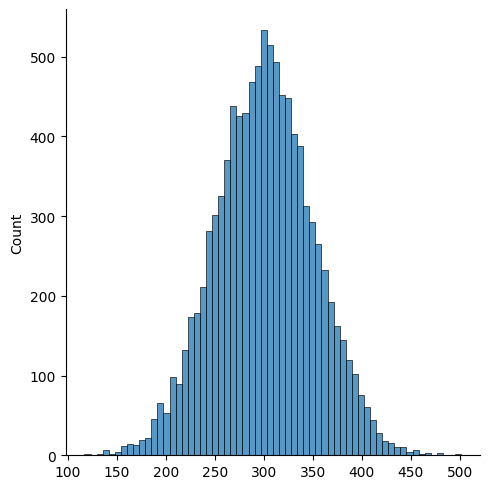

In [13]:
import seaborn as sns
mean_check = 300   
std_check = 50

# use stats.norm.rvs to generate normal dist. check function with ?
checks = stats.norm.rvs(loc=mean_check, scale=std_check, size=10_000)# you code
sns.displot(checks)

stats.norm.rvs(loc, scale, size) генерує випадкові значення з нормального розподілу.

loc — середнє значення (μ).

scale — стандартне відхилення (σ).

size — кількість згенерованих значень

# Порівняння біноміальних розподілів з різними `n`
 
Біноміальний розподіл з малим n та з великим n


# Візуалізація

sns.displot(b, kde=False, bins=20, color='green')

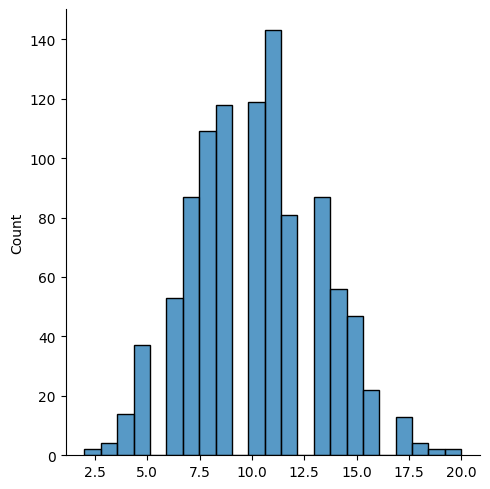

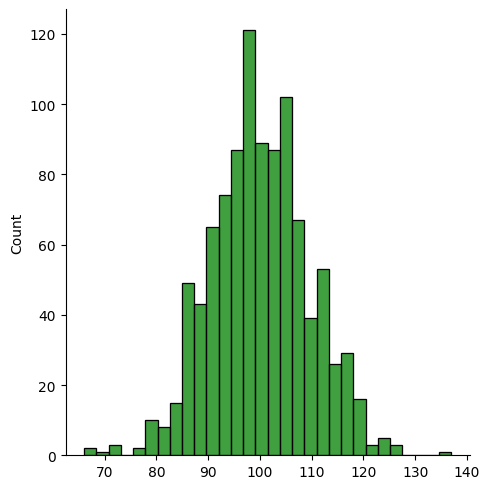

In [21]:
# use stats.binom.rvs with small n and p = 0.10 and size = 1000
a = stats.binom.rvs(n=100, p=0.10, size=1000) 

# use stats.binom.rvs with big n and p = 0.10 and size = 1000
b = stats.binom.rvs(n=1000, p=0.10, size=1000)
sns.displot(a)
sns.displot(b, color='green')


# Незалежний t-тест для двох вибірок Бернуллі

stats.ttest_ind(B, A) перевіряє, чи мають дві незалежні вибірки однакове середнє.

pvalue — ймовірність отримати таку різницю середніх випадково.

p_value — p-значение:

Если p_value < 0.05 → разница между выборками значимая.

Если p_value > 0.05 → разница может быть случайной.

Интерпретация

Этот тест часто используется в A/B тестах, чтобы понять, отличается ли конверсия двух групп.

В данном примере проверяется, отличается ли частота «успехов» между выборками A и B.

In [ ]:
np.random.seed(2)

n = 500
p = 0.10

A = stats.bernoulli.rvs(p, size=n)
B = stats.bernoulli.rvs(p, size=n)
p_value = stats.ttest_ind(B, A).pvalue
print(p_value)


0.3047779346429746


# Генерація біноміального розподілу для A/B тесту

np.random.binomial(n=1, p, size=n) для n=1 імітує Бернуллі для кожного користувача.

Кожне значення 1 = успіх (наприклад, покупка), 0 = неуспіх.

Використовується для моделювання A/B тестів та розрахунку конверсії.

In [28]:
import numpy as np
from scipy import stats


np.random.seed(42)

n = 500     # number of trials

p_a = 0.10  # probability of success for group A
p_b = 0.12  # probability of success for group B

# use np.random.binomial to generate dist for p_a, p_b, with size n 
# Генеруємо випадкові дані для кожної групи
A = np.random.binomial(n=1, p=p_a, size=n)
B = np.random.binomial(n=1, p=p_b, size=n)

print(A[:10])  # перші 10 результатів для групи A
print(B[:10])  # перші 10 результатів для групи B


[0 1 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 1 0 1 0]


In [30]:
# calculate mean, can use .mean()
mean_A = A.mean()
mean_B = B.mean()
print(mean_A)
print(mean_B)

0.11
0.11


# Незалежний t-тест для двох груп A/B
Независимый t-тест (stats.ttest_ind)

Что делает код:

stats.ttest_ind(B, A) — выполняет независимый t-тест для двух выборок:

Проверяет, есть ли статистически значимая разница между средними двух независимых групп (A и B).

В контексте A/B теста среднее = доля успехов (например, конверсия).

Результат возвращается в виде двух переменных:

t_stat — t-статистика, отражает относительную разницу между средними.

p_value — p-значение, вероятность получить такую разницу случайно.

Интерпретация:

p_value < 0.05 → разница между группами статистически значима.

p_value >= 0.05 → разница может быть случайной, нет оснований отвергать гипотезу о равенстве средних.

In [31]:
# create two variables and save result of stats.ttest_ind(<you group result B>, <you group result A>)
from scipy import stats

# Незалежний t-тест для двох груп
t_stat, p_value = stats.ttest_ind(B, A)

print("t-statistic:", t_stat)
print("p-value:", p_value)


t-statistic: 0.0
p-value: 1.0
